In [1]:
import pandas as pd

# Load the dataset with the correct delimiter
file_path = 'data.csv'  # Ganti dengan path ke file data.csv kamu
data = pd.read_csv(file_path, delimiter=';')

# Select only the relevant columns
data = data[['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']]

# Convert the 'Tanggal' column to datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')

# Remove commas from numerical columns and convert them to numeric type
data['Terakhir'] = data['Terakhir']
data['Pembukaan'] = data['Pembukaan']
data['Tertinggi'] = data['Tertinggi']
data['Terendah'] = data['Terendah']

# Display the cleaned data
print(data.head())

# # Save the cleaned data to a new CSV file (optional)
# data.to_csv('cleaned_data.csv', index=False)


C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


     Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah
0 2024-05-29     17823      18040      18043     17808
1 2024-05-28     18090      18460      18595     18050
2 2024-05-24     18340      18460      18485     18300
3 2024-05-23     18485      18815      19005     18380
4 2024-05-22     18750      18580      18800     18565


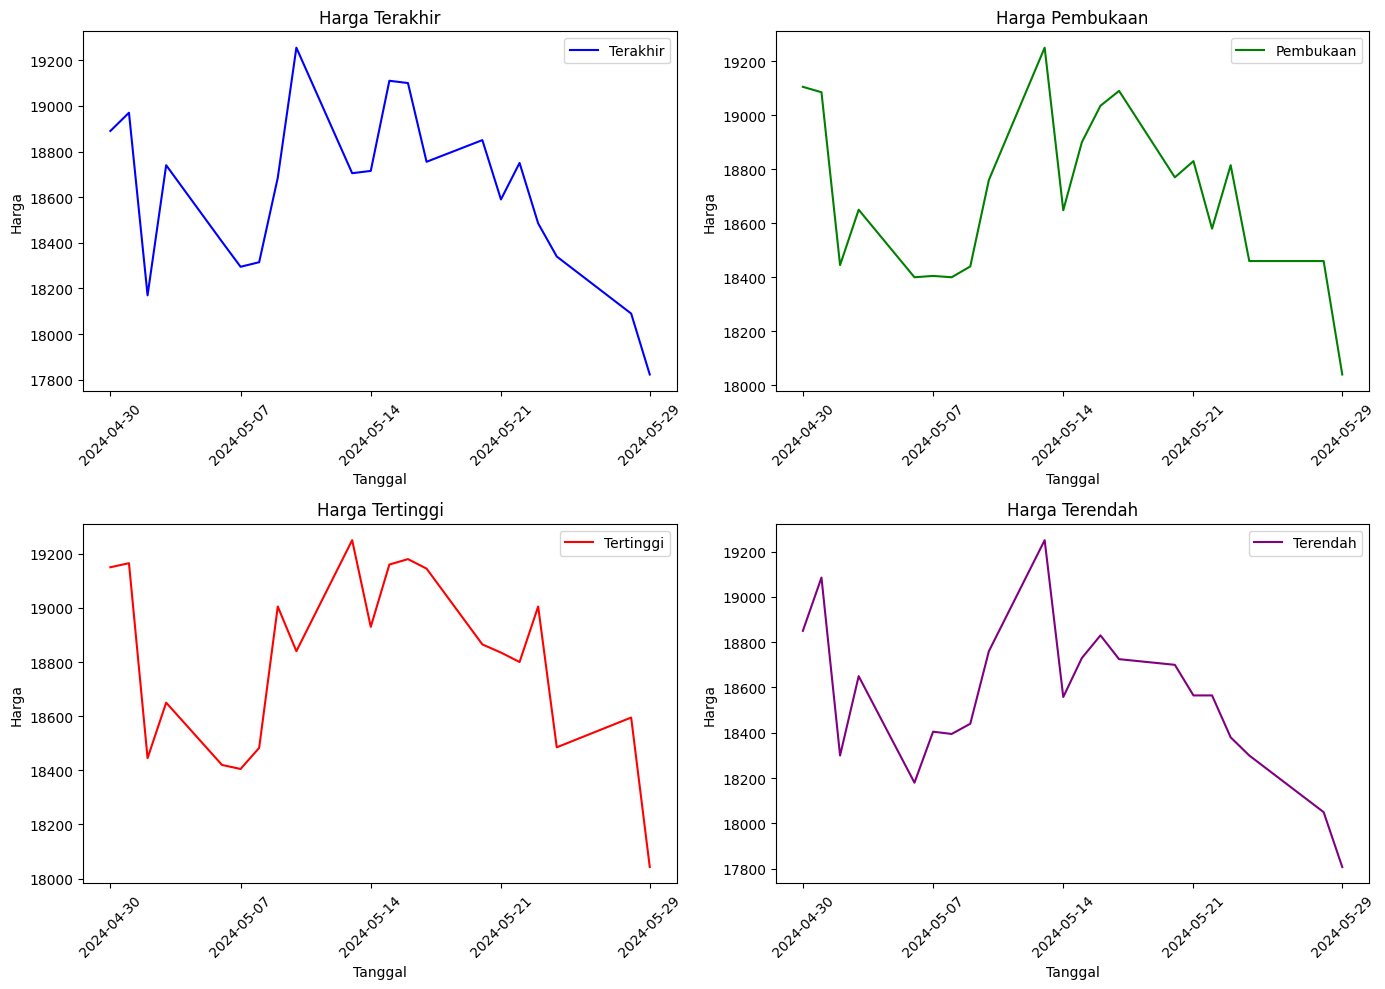

In [3]:
import matplotlib.pyplot as plt
# Plot the data
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Function to set x-axis labels for every 5 days
def set_date_labels(ax, dates):
    ax.set_xticks(dates[::5])
    ax.set_xticklabels(dates.dt.strftime('%Y-%m-%d')[::5], rotation=45)

# Plot 'Terakhir'
axs[0, 0].plot(data['Tanggal'], data['Terakhir'], label='Terakhir', color='blue')
axs[0, 0].set_title('Harga Terakhir')
axs[0, 0].set_xlabel('Tanggal')
axs[0, 0].set_ylabel('Harga')
axs[0, 0].legend()
set_date_labels(axs[0, 0], data['Tanggal'])

# Plot 'Pembukaan'
axs[0, 1].plot(data['Tanggal'], data['Pembukaan'], label='Pembukaan', color='green')
axs[0, 1].set_title('Harga Pembukaan')
axs[0, 1].set_xlabel('Tanggal')
axs[0, 1].set_ylabel('Harga')
axs[0, 1].legend()
set_date_labels(axs[0, 1], data['Tanggal'])

# Plot 'Tertinggi'
axs[1, 0].plot(data['Tanggal'], data['Tertinggi'], label='Tertinggi', color='red')
axs[1, 0].set_title('Harga Tertinggi')
axs[1, 0].set_xlabel('Tanggal')
axs[1, 0].set_ylabel('Harga')
axs[1, 0].legend()
set_date_labels(axs[1, 0], data['Tanggal'])

# Plot 'Terendah'
axs[1, 1].plot(data['Tanggal'], data['Terendah'], label='Terendah', color='purple')
axs[1, 1].set_title('Harga Terendah')
axs[1, 1].set_xlabel('Tanggal')
axs[1, 1].set_ylabel('Harga')
axs[1, 1].legend()
set_date_labels(axs[1, 1], data['Tanggal'])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

Uji Augmented Dickey-Fuller: Terakhir
ADF Test Statistic             -3.199165
p-value                         0.020033
#Lags Used                      0.000000
Number of Observations Used    20.000000
Nilai Kritis (1%)              -3.809209
Nilai Kritis (5%)              -3.021645
Nilai Kritis (10%)             -2.650713
Hasil:
Tolak hipotesis nol - Data adalah stasioner
Uji Augmented Dickey-Fuller: Pembukaan
ADF Test Statistic             -3.840932
p-value                         0.002515
#Lags Used                      6.000000
Number of Observations Used    14.000000
Nilai Kritis (1%)              -4.012034
Nilai Kritis (5%)              -3.104184
Nilai Kritis (10%)             -2.690987
Hasil:
Tolak hipotesis nol - Data adalah stasioner
Uji Augmented Dickey-Fuller: Tertinggi
ADF Test Statistic             -1.336236
p-value                         0.612436
#Lags Used                      8.000000
Number of Observations Used    12.000000
Nilai Kritis (1%)              -4.137829
Nil

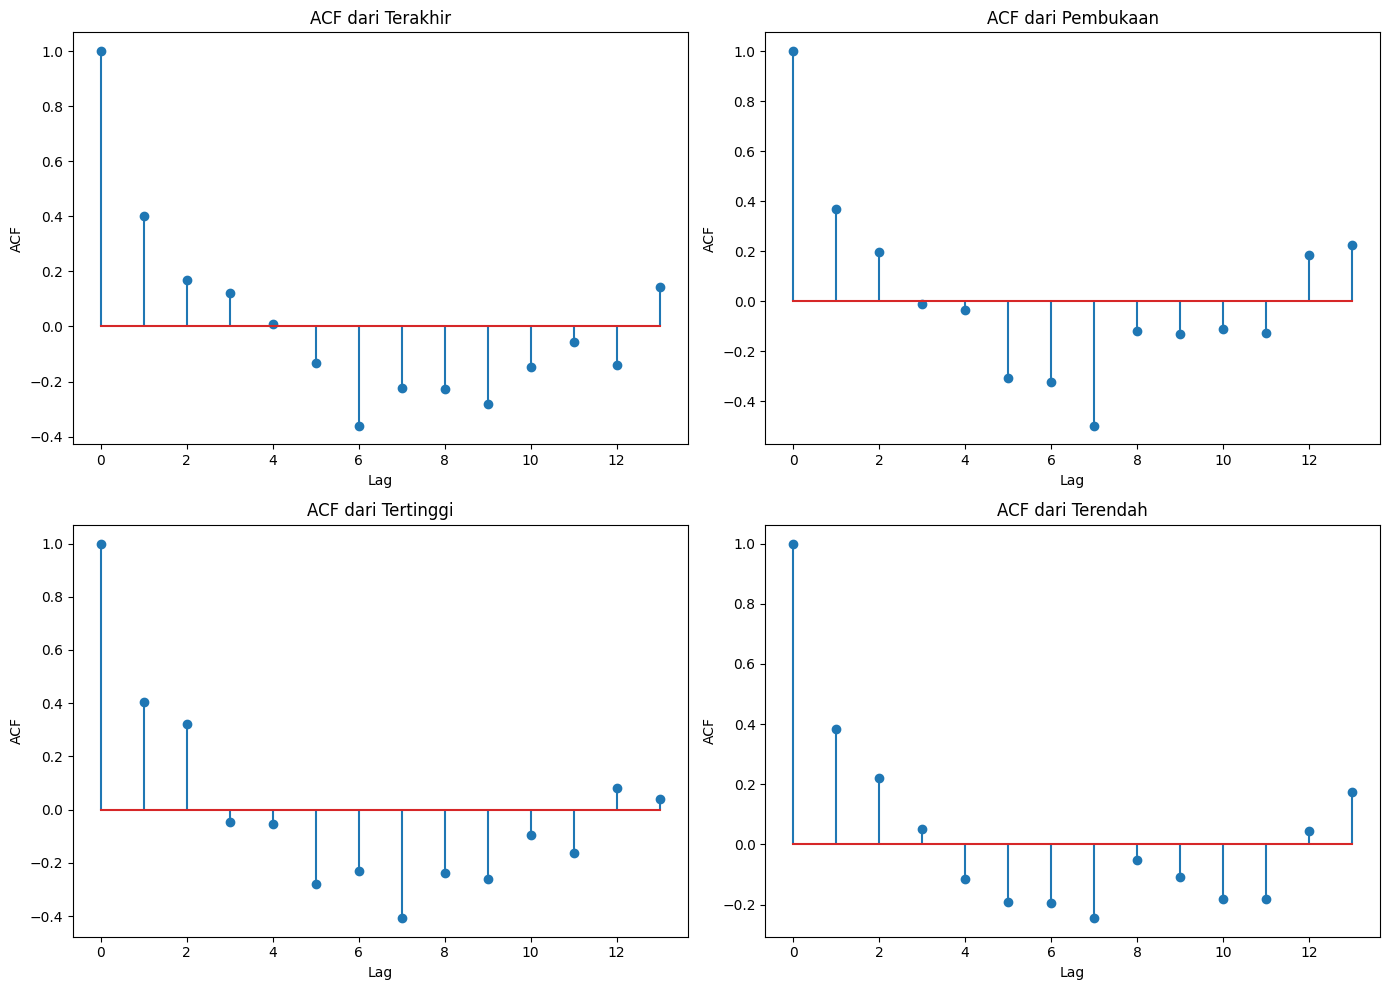

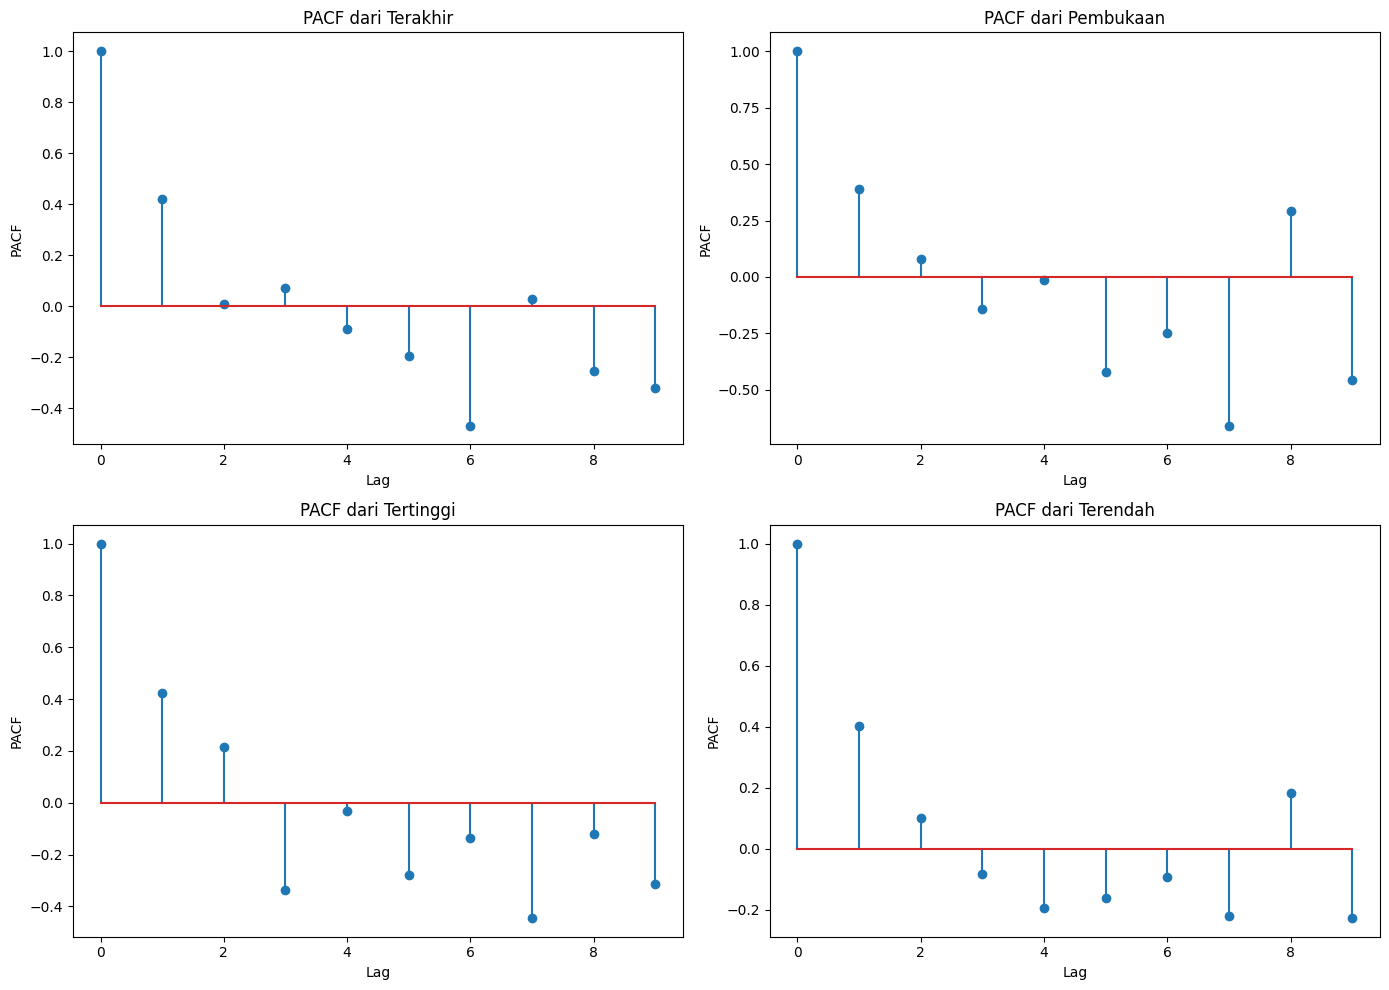

       Kolom  Stasioner
0   Terakhir       True
1  Pembukaan       True
2  Tertinggi      False
3   Terendah       True
Uji Augmented Dickey-Fuller: Differenced Tertinggi
ADF Test Statistic             -1.547364
p-value                         0.509965
#Lags Used                      6.000000
Number of Observations Used    13.000000
Nilai Kritis (1%)              -4.068854
Nilai Kritis (5%)              -3.127149
Nilai Kritis (10%)             -2.701730
Hasil:
Gagal menolak hipotesis nol - Data tidak stasioner

Ringkasan setelah differencing (jika diperlukan):
Uji Augmented Dickey-Fuller: Differenced Tertinggi
ADF Test Statistic             -1.547364
p-value                         0.509965
#Lags Used                      6.000000
Number of Observations Used    13.000000
Nilai Kritis (1%)              -4.068854
Nilai Kritis (5%)              -3.127149
Nilai Kritis (10%)             -2.701730
Hasil:
Gagal menolak hipotesis nol - Data tidak stasioner
       Kolom  Stasioner
0   Terakhir 

In [6]:
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Fungsi untuk melakukan uji ADF (Augmented Dickey-Fuller)
def uji_adf(series, title=''):
    print(f'Uji Augmented Dickey-Fuller: {title}')  # Cetak judul uji ADF
    hasil = adfuller(series, autolag='AIC')  # Lakukan uji ADF pada data
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']  # Label untuk hasil uji
    out = pd.Series(hasil[0:4], index=labels)  # Simpan hasil uji dalam Series pandas
    for key, val in hasil[4].items():  # Tambahkan nilai kritis ke dalam hasil
        out[f'Nilai Kritis ({key})'] = val
    print(out.to_string())  # Cetak hasil uji
    print('Hasil:')
    if hasil[1] <= 0.05:  # Jika p-value <= 0.05, data dianggap stasioner
        print("Tolak hipotesis nol - Data adalah stasioner")
        return True
    else:  # Jika p-value > 0.05, data tidak stasioner
        print("Gagal menolak hipotesis nol - Data tidak stasioner")
        return False

# Lakukan uji ADF pada setiap kolom data
kolom = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
summary_stasioner = {}  # Dictionary untuk menyimpan hasil uji stasioneritas

for kol in kolom:
    is_stasioner = uji_adf(data[kol], title=kol)  # Uji ADF pada kolom
    summary_stasioner[kol] = is_stasioner  # Simpan hasil uji

# Tampilkan plot ACF dan PACF
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Buat plot 2x2

for i, kol in enumerate(kolom):
    ax_acf = axs[i//2, i%2]  # Pilih subplot
    acf_vals = acf(data[kol].dropna(), fft=False)  # Hitung nilai ACF
    pacf_vals = pacf(data[kol].dropna())  # Hitung nilai PACF
    ax_acf.stem(range(len(acf_vals)), acf_vals)  # Plot ACF
    ax_acf.set_title(f'ACF dari {kol}')  # Set judul plot
    ax_acf.set_xlabel('Lag')  # Set label sumbu x
    ax_acf.set_ylabel('ACF')  # Set label sumbu y

plt.tight_layout()  # Atur tata letak plot agar tidak tumpang tindih
plt.show()  # Tampilkan plot

fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Buat plot 2x2 untuk PACF

for i, kol in enumerate(kolom):
    ax_pacf = axs[i//2, i%2]  # Pilih subplot
    pacf_vals = pacf(data[kol].dropna())  # Hitung nilai PACF
    ax_pacf.stem(range(len(pacf_vals)), pacf_vals)  # Plot PACF
    ax_pacf.set_title(f'PACF dari {kol}')  # Set judul plot
    ax_pacf.set_xlabel('Lag')  # Set label sumbu x
    ax_pacf.set_ylabel('PACF')  # Set label sumbu y

plt.tight_layout()  # Atur tata letak plot agar tidak tumpang tindih
plt.show()  # Tampilkan plot

# Tabel ringkasan stasioneritas
summary_df = pd.DataFrame(summary_stasioner.items(), columns=['Kolom', 'Stasioner'])
print(summary_df)  # Cetak tabel ringkasan

# Differencing jika tidak stasioner
data_differenced = data.copy()  # Salin data asli
for kol in kolom:
    if not summary_stasioner[kol]:  # Jika data tidak stasioner
        data_differenced[kol] = data[kol].diff().dropna()  # Lakukan differencing
        uji_adf(data_differenced[kol].dropna(), title=f'Differenced {kol}')  # Uji ADF ulang pada data yang sudah di-differencing

# Tampilkan ringkasan setelah differencing
print("\nRingkasan setelah differencing (jika diperlukan):")
for kol in kolom:
    if not summary_stasioner[kol]:  # Jika data tidak stasioner sebelumnya
        is_stasioner = uji_adf(data_differenced[kol].dropna(), title=f'Differenced {kol}')  # Uji ADF ulang pada data yang sudah di-differencing
        summary_stasioner[kol] = is_stasioner  # Update hasil uji stasioneritas

summary_df = pd.DataFrame(summary_stasioner.items(), columns=['Kolom', 'Stasioner'])
print(summary_df)  # Cetak tabel ringkasan setelah differencing


In [8]:
# Fungsi untuk menghitung komponen AIC
def calculate_aic(y, y_pred, k):
    residuals = y - y_pred  # Menghitung residuals (selisih antara nilai aktual dan prediksi)
    sse = np.sum(residuals**2)  # Menghitung jumlah kuadrat residuals
    aic = len(y) * np.log(sse/len(y)) + 2 * k  # Menghitung nilai AIC
    return aic

# Langkah 1: Implementasi Komponen AR (Autoregressive)
def autoregressive_component(series, p):
    ar_component = np.zeros_like(series)  # Membuat array kosong untuk menyimpan komponen AR
    for t in range(p, len(series)):
        # Menghitung nilai AR berdasarkan p periode sebelumnya
        ar_component[t] = np.dot(series[t-p:t][::-1], np.ones(p))
    return ar_component

# Langkah 2: Implementasi Komponen I (Integration/Differencing)
def differencing(series, d):
    diff_series = series.copy()  # Salin data asli
    for _ in range(d):
        # Lakukan differencing untuk membuat data stasioner
        diff_series = np.diff(diff_series, n=1)
    # Menggabungkan kembali hasil differencing dengan data asli untuk menjaga panjang data
    return np.concatenate((series[:d], diff_series))

# Langkah 3: Implementasi Komponen MA (Moving Average)
def moving_average_component(series, q):
    ma_component = np.zeros_like(series)  # Membuat array kosong untuk menyimpan komponen MA
    for t in range(q, len(series)):
        # Menghitung nilai MA berdasarkan q periode sebelumnya
        ma_component[t] = np.mean(series[t-q:t])
    return ma_component

# Fungsi untuk melakukan ARIMA manual
def manual_arima(series, p, d, q):
    diff_series = differencing(series, d)  # Langkah differencing
    ar_series = autoregressive_component(diff_series, p)  # Langkah autoregressive
    ma_series = moving_average_component(diff_series, q)  # Langkah moving average
    # Gabungkan komponen AR, MA, dan differencing untuk mendapatkan hasil ARIMA
    arima_series = ar_series + ma_series
    return arima_series

# Pencarian parameter terbaik untuk ARIMA
def find_best_arima_params(data, p_values, d_values, q_values):
    best_aic = np.inf  # Inisialisasi nilai AIC terbaik dengan infinity
    best_params = None  # Inisialisasi parameter terbaik
    best_model = None  # Inisialisasi model terbaik
    
    # Iterasi melalui semua kombinasi parameter p, d, dan q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Prediksi menggunakan ARIMA manual dengan parameter saat ini
                    y_pred = manual_arima(data, p, d, q)
                    # Hitung nilai AIC
                    aic = calculate_aic(data[d:], y_pred[d:], p+q)
                    # Jika nilai AIC lebih baik, simpan parameter dan model saat ini sebagai yang terbaik
                    if aic < best_aic:
                        best_aic = aic
                        best_params = (p, d, q)
                        best_model = y_pred
                except:
                    continue
    return best_params, best_model

# Fungsi untuk menghitung metrik evaluasi
def calculate_metrics(original, predicted):
    mse = np.mean((original - predicted) ** 2)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mae = np.mean(np.abs(original - predicted))  # Mean Absolute Error
    mape = np.mean(np.abs((original - predicted) / original)) * 100  # Mean Absolute Percentage Error
    return mse, rmse, mae, mape

# Nilai parameter yang akan dicoba
p_values = range(0, 3)  # Nilai p dari 0 hingga 2
d_values = range(0, 3)  # Nilai d dari 0 hingga 2
q_values = range(0, 3)  # Nilai q dari 0 hingga 2

# Fungsi untuk mencari parameter terbaik dan menghitung metrik evaluasi untuk setiap kolom
def get_best_params_and_metrics(column_name):
    series = data[column_name].values  # Ambil data kolom
    # Cari parameter terbaik
    best_params, best_model = find_best_arima_params(series, p_values, d_values, q_values)
    # Cetak parameter terbaik
    print(f"Parameter terbaik untuk {column_name}: p={best_params[0]}, d={best_params[1]}, q={best_params[2]}")
    # Ganti prediksi 0 dengan data asli pada iterasi pertama
    best_model[0] = series[0]
    # Hitung metrik evaluasi
    mse, rmse, mae, mape = calculate_metrics(series, best_model)
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")

# Cari parameter terbaik dan hitung metrik evaluasi untuk setiap kolom harga
for kol in ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']:
    get_best_params_and_metrics(kol)


Parameter terbaik untuk Terakhir: p=0, d=0, q=1
MSE: 117278.04761904762, RMSE: 342.4588261660774, MAE: 267.0, MAPE: 1.4288360315920359
Parameter terbaik untuk Pembukaan: p=0, d=0, q=1
MSE: 87237.28571428571, RMSE: 295.35958713792536, MAE: 221.85714285714286, MAPE: 1.1791076414462256
Parameter terbaik untuk Tertinggi: p=0, d=0, q=1
MSE: 93064.14285714286, RMSE: 305.0641618695039, MAE: 223.66666666666666, MAPE: 1.186449409391639
Parameter terbaik untuk Terendah: p=0, d=0, q=1
MSE: 100957.71428571429, RMSE: 317.7384369032401, MAE: 234.0952380952381, MAPE: 1.2516004187293523


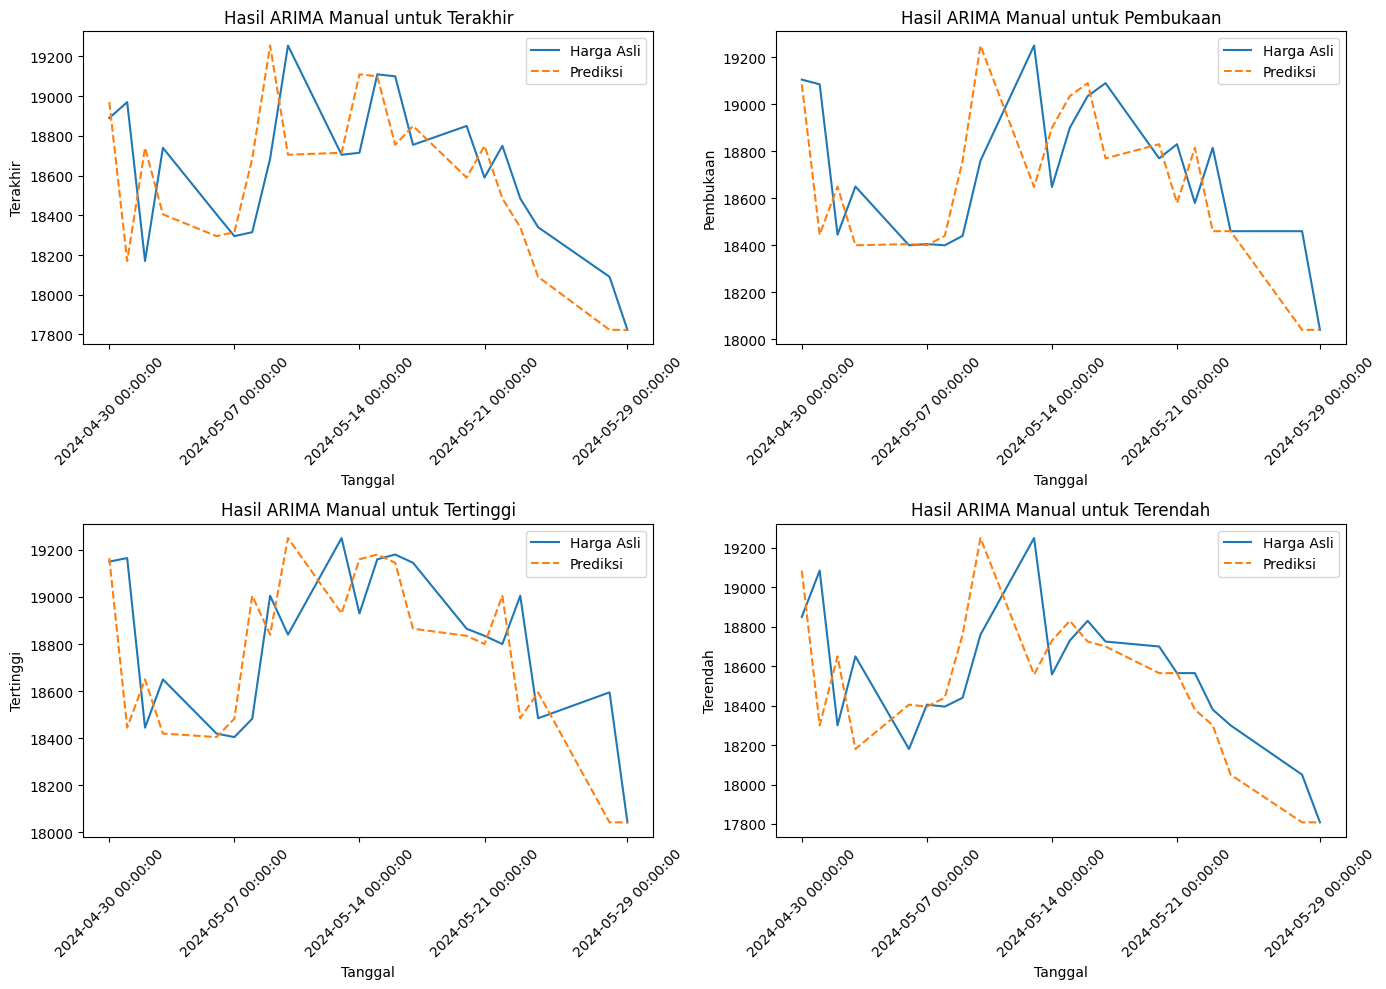


Hasil ARIMA untuk Terakhir:
      Tanggal  Harga Asli  Prediksi  Selisih  Persentase Selisih
0  2024-04-30       18890     18970      -80           -0.423504
1  2024-05-01       18970     18170      800            4.217185
2  2024-05-02       18170     18740     -570           -3.137039
3  2024-05-03       18740     18405      335            1.787620
4  2024-05-06       18405     18295      110            0.597664
5  2024-05-07       18295     18315      -20           -0.109319
6  2024-05-08       18315     18685     -370           -2.020202
7  2024-05-09       18685     19255     -570           -3.050575
8  2024-05-10       19255     18705      550            2.856401
9  2024-05-13       18705     18715      -10           -0.053462
10 2024-05-14       18715     19110     -395           -2.110606
11 2024-05-15       19110     19100       10            0.052329
12 2024-05-16       19100     18755      345            1.806283
13 2024-05-17       18755     18850      -95           -0.506

In [9]:
# Membuat DataFrame untuk menyimpan hasil perhitungan
results = {}
best_params_dict = {}

# Proses untuk setiap kolom harga
for kol in ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']:
    series = data[kol].values
    # Cari parameter terbaik
    best_params, best_model = find_best_arima_params(series, p_values, d_values, q_values)
    best_params_dict[kol] = best_params  # Simpan parameter terbaik untuk kolom
    results[kol] = best_model  # Simpan hasil prediksi

# Plot hasil ARIMA dengan parameter terbaik dalam format 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, kol in enumerate(['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']):
    original = data[kol].values
    prediction = results[kol]
    
    # Ganti prediksi 0 dengan data asli pada iterasi pertama
    prediction[0] = original[0]
    
    # Hitung selisih dan persentase selisih
    difference = original - prediction
    percentage_difference = (difference / original) * 100

    # Buat DataFrame untuk setiap kolom
    df_result = pd.DataFrame({
        'Tanggal': data['Tanggal'],
        'Harga Asli': original,
        'Prediksi': prediction,
        'Selisih': difference,
        'Persentase Selisih': percentage_difference
    })
    
    # Urutkan DataFrame berdasarkan tanggal dari yang terlama hingga terbaru
    df_result = df_result.sort_values(by='Tanggal').reset_index(drop=True)

    # Plot hasil ARIMA
    ax = axs[i//2, i%2]
    ax.plot(df_result['Tanggal'], df_result['Harga Asli'], label='Harga Asli')
    ax.plot(df_result['Tanggal'], df_result['Prediksi'], label='Prediksi', linestyle='--')
    ax.set_title(f'Hasil ARIMA Manual untuk {kol}')
    ax.set_xlabel('Tanggal')
    ax.set_ylabel(kol)
    ax.legend()
    # Set interval tanggal setiap 5 hari
    ax.set_xticks(df_result['Tanggal'][::5])
    ax.set_xticklabels(df_result['Tanggal'][::5], rotation=45)

plt.tight_layout()
plt.show()

# Tampilkan hasil dalam bentuk tabel untuk setiap kolom
for kol in ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']:
    original = data[kol].values
    prediction = results[kol]
    
    # Ganti prediksi 0 dengan data asli pada iterasi pertama
    prediction[0] = original[0]
    
    # Hitung selisih dan persentase selisih
    difference = original - prediction
    percentage_difference = (difference / original) * 100

    # Buat DataFrame untuk setiap kolom
    df_result = pd.DataFrame({
        'Tanggal': data['Tanggal'],
        'Harga Asli': original,
        'Prediksi': prediction,
        'Selisih': difference,
        'Persentase Selisih': percentage_difference
    })
    
    # Urutkan DataFrame berdasarkan tanggal dari yang terlama hingga terbaru
    df_result = df_result.sort_values(by='Tanggal').reset_index(drop=True)

    print(f"\nHasil ARIMA untuk {kol}:")
    print(df_result)


C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Parameter terbaik untuk Terakhir: p=0, d=0, q=1, P=0, D=2, Q=2, m=6
MSE: 30004097.0, RMSE: 5477.599565503123, MAE: 2574.809523809524, MAPE: 13.653484770926744

Hasil SARIMA untuk Terakhir:
      Tanggal  Harga Asli  Prediksi  Selisih  Persentase Selisih
0  2024-04-30       18890      9132     9758           51.656961
1  2024-05-01       18970      7520    11450           60.358461
2  2024-05-02       18170      9034     9136           50.280682
3  2024-05-03       18740     18372      368            1.963714
4  2024-05-06       18405     17292     1113            6.047270
5  2024-05-07       18295     17252     1043            5.701011
6  2024-05-08       18315     17985      330            1.801802
7  2024-05-09       18685     17800      885            4.736420
8  2024-05-10       19255     37041   -17786          -92.370813
9  2024-05-13       18705     18715      -10           -0.053462
10 2024-05-14       18715     19110     -395           -2.110606
11 2024-05-15       19110     1

C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Parameter terbaik untuk Pembukaan: p=0, d=0, q=1, P=0, D=2, Q=2, m=6
MSE: 31335951.04761905, RMSE: 5597.852360291316, MAE: 2568.9523809523807, MAPE: 13.66146289336306

Hasil SARIMA untuk Pembukaan:
      Tanggal  Harga Asli  Prediksi  Selisih  Persentase Selisih
0  2024-04-30       19105     10207     8898           46.574195
1  2024-05-01       19085      8600    10485           54.938433
2  2024-05-02       18445      7995    10450           56.654920
3  2024-05-03       18650     18724      -74           -0.396783
4  2024-05-06       18400     18034      366            1.989130
5  2024-05-07       18405     17647      758            4.118446
6  2024-05-08       18400     17467      933            5.070652
7  2024-05-09       18440     18035      405            2.196312
8  2024-05-10       18760     37655   -18895         -100.719616
9  2024-05-13       19250     18648      602            3.127273
10 2024-05-14       18648     18900     -252           -1.351351
11 2024-05-15       18

C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Parameter terbaik untuk Tertinggi: p=0, d=0, q=1, P=0, D=2, Q=2, m=6
MSE: 32056520.714285713, RMSE: 5661.847818008332, MAE: 2603.190476190476, MAPE: 13.794075135980451

Hasil SARIMA untuk Tertinggi:
      Tanggal  Harga Asli  Prediksi  Selisih  Persentase Selisih
0  2024-04-30       19150      9194     9956           51.989556
1  2024-05-01       19165      8857    10308           53.785547
2  2024-05-02       18445      7994    10451           56.660342
3  2024-05-03       18650     18402      248            1.329759
4  2024-05-06       18420     17955      465            2.524430
5  2024-05-07       18405     17690      715            3.884814
6  2024-05-08       18483     18142      341            1.844939
7  2024-05-09       19005     18023      982            5.167061
8  2024-05-10       18840     37704   -18864         -100.127389
9  2024-05-13       19250     18930      320            1.662338
10 2024-05-14       18930     19160     -230           -1.215003
11 2024-05-15       1

C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Hizamrul\AppData\Roaming\Python\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Parameter terbaik untuk Terendah: p=0, d=0, q=1, P=0, D=2, Q=2, m=6
MSE: 31591866.85714286, RMSE: 5620.664271875955, MAE: 2570.9523809523807, MAPE: 13.730563173313005

Hasil SARIMA untuk Terendah:
      Tanggal  Harga Asli  Prediksi  Selisih  Persentase Selisih
0  2024-04-30       18850      9862     8988           47.681698
1  2024-05-01       19085      8362    10723           56.185486
2  2024-05-02       18300      7649    10651           58.202186
3  2024-05-03       18650     18536      114            0.611260
4  2024-05-06       18180     17886      294            1.617162
5  2024-05-07       18405     17590      815            4.428145
6  2024-05-08       18395     17605      790            4.294645
7  2024-05-09       18440     17555      885            4.799349
8  2024-05-10       18760     37504   -18744          -99.914712
9  2024-05-13       19250     18558      692            3.594805
10 2024-05-14       18558     18730     -172           -0.926824
11 2024-05-15       187

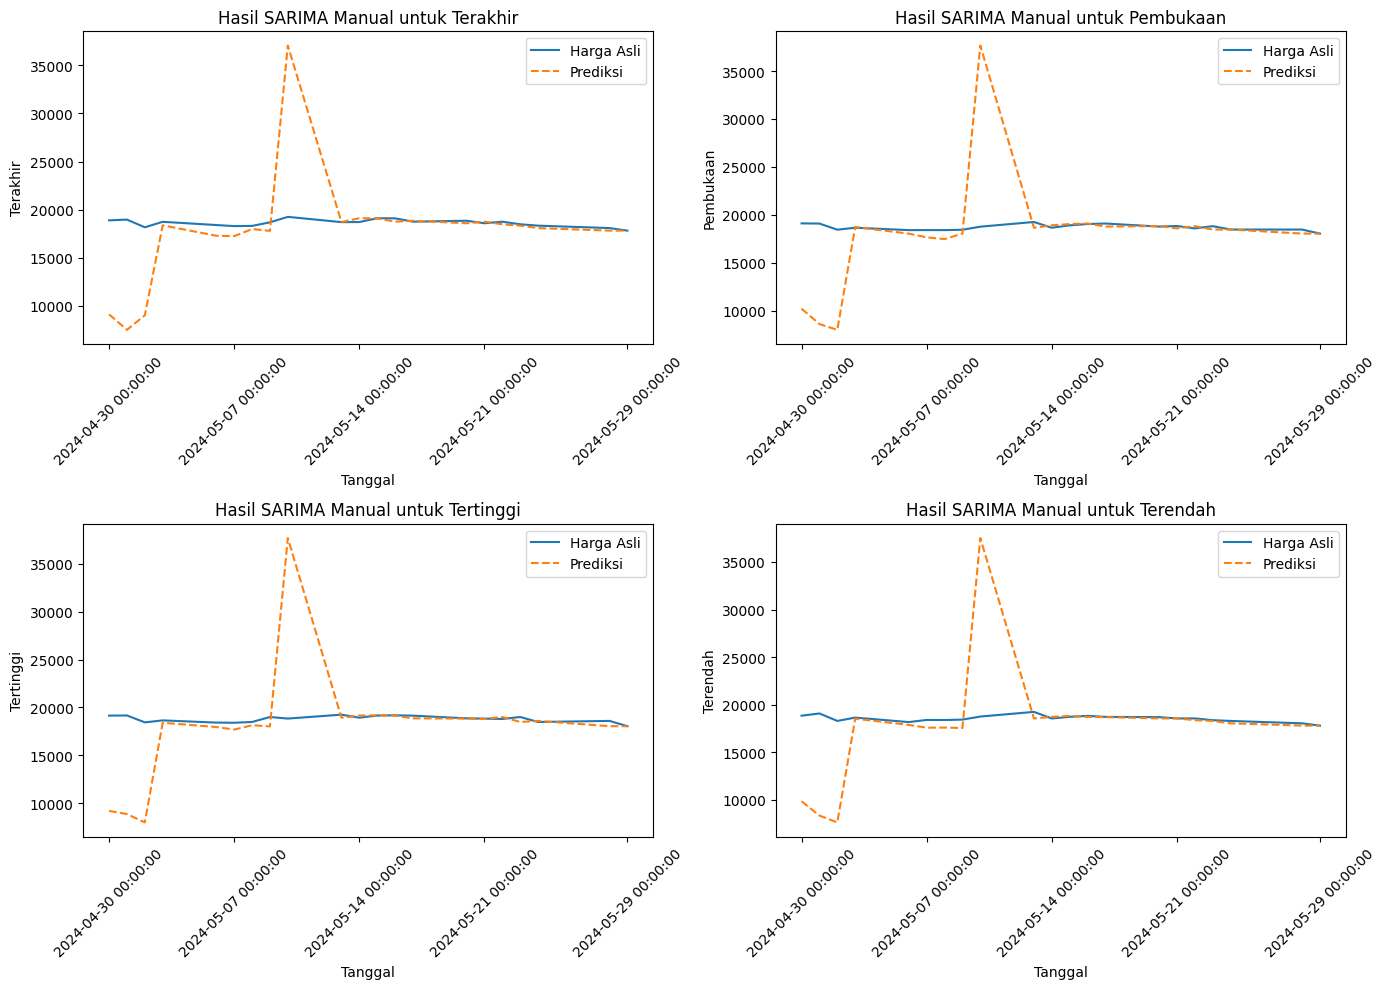

In [12]:
# Langkah 1: Implementasi Komponen Musiman AR (Autoregressive)
def seasonal_ar_component(series, P, m):
    ar_component = np.zeros_like(series)  # Membuat array kosong untuk menyimpan komponen musiman AR
    for t in range(P * m, len(series)):
        # Menghitung nilai musiman AR berdasarkan P periode musiman sebelumnya
        ar_component[t] = np.dot(series[t - P * m:t:m], np.ones(P))
    return ar_component

# Langkah 2: Implementasi Komponen Musiman I (Integration/Differencing)
def seasonal_differencing(series, D, m):
    diff_series = series.copy()
    for _ in range(D):
        # Lakukan differencing musiman untuk membuat data stasioner
        diff_series = diff_series[m:] - diff_series[:-m]
    return np.concatenate((series[:D * m], diff_series))

# Langkah 3: Implementasi Komponen Musiman MA (Moving Average)
def seasonal_ma_component(series, Q, m):
    ma_component = np.zeros_like(series)  # Membuat array kosong untuk menyimpan komponen musiman MA
    for t in range(Q * m, len(series)):
        # Menghitung nilai musiman MA berdasarkan Q periode musiman sebelumnya
        ma_component[t] = np.mean(series[t - Q * m:t:m])
    return ma_component

# Fungsi untuk melakukan SARIMA manual
def manual_sarima(series, p, d, q, P, D, Q, m):
    # Langkah differencing non-musiman
    diff_series = differencing(series, d)
    # Langkah differencing musiman
    seasonal_diff_series = seasonal_differencing(diff_series, D, m)
    
    # Langkah autoregressive non-musiman
    ar_series = autoregressive_component(seasonal_diff_series, p)
    # Langkah moving average non-musiman
    ma_series = moving_average_component(seasonal_diff_series, q)
    
    # Langkah autoregressive musiman
    seasonal_ar_series = seasonal_ar_component(seasonal_diff_series, P, m)
    # Langkah moving average musiman
    seasonal_ma_series = seasonal_ma_component(seasonal_diff_series, Q, m)
    
    # Gabungkan semua komponen
    sarima_series = ar_series + ma_series + seasonal_ar_series + seasonal_ma_series
    return sarima_series

# Pencarian parameter terbaik untuk SARIMA
def find_best_sarima_params(data, p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    best_aic = np.inf
    best_params = None
    best_model = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in m_values:
                                try:
                                    y_pred = manual_sarima(data, p, d, q, P, D, Q, m)
                                    aic = calculate_aic(data[max(d, D * m):], y_pred[max(d, D * m):], p + q + P + Q)
                                    if aic < best_aic:
                                        best_aic = aic
                                        best_params = (p, d, q, P, D, Q, m)
                                        best_model = y_pred
                                except:
                                    continue
    return best_params, best_model

# Nilai parameter yang akan dicoba
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
P_values = range(0, 3)
D_values = range(0, 3)
Q_values = range(0, 3)
m_values = [6]  # Musim tahunan

# Membuat DataFrame untuk menyimpan hasil perhitungan
results = {}
best_params_dict = {}

# Proses untuk setiap kolom harga
for kol in ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']:
    series = data[kol].values
    best_params, best_model = find_best_sarima_params(series, p_values, d_values, q_values, P_values, D_values, Q_values, m_values)
    best_params_dict[kol] = best_params  # Simpan parameter terbaik untuk kolom
    results[kol] = best_model  # Simpan hasil prediksi
    
    print(f"Parameter terbaik untuk {kol}: p={best_params[0]}, d={best_params[1]}, q={best_params[2]}, P={best_params[3]}, D={best_params[4]}, Q={best_params[5]}, m={best_params[6]}")
    
    # Ganti prediksi 0 dengan data asli pada iterasi pertama
    best_model[0] = series[0]
    
    # Hitung metrik evaluasi
    mse, rmse, mae, mape = calculate_metrics(series, best_model)
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")

    # Buat DataFrame untuk hasil
    df_result = pd.DataFrame({
        'Tanggal': data['Tanggal'],
        'Harga Asli': series,
        'Prediksi': best_model,
        'Selisih': series - best_model,
        'Persentase Selisih': (series - best_model) / series * 100
    })

    # Urutkan DataFrame berdasarkan tanggal dari yang terlama hingga terbaru
    df_result = df_result.sort_values(by='Tanggal').reset_index(drop=True)

    # Tampilkan hasil dalam bentuk tabel
    print(f"\nHasil SARIMA untuk {kol}:")
    print(df_result)

# Plot hasil SARIMA dengan parameter terbaik dalam format 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, kol in enumerate(['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']):
    original = data[kol].values
    prediction = results[kol]
    
    # Ganti prediksi 0 dengan data asli pada iterasi pertama
    prediction[0] = original[0]
    
    # Buat DataFrame untuk setiap kolom
    df_result = pd.DataFrame({
        'Tanggal': data['Tanggal'],
        'Harga Asli': original,
        'Prediksi': prediction
    })
    
    # Urutkan DataFrame berdasarkan tanggal dari yang terlama hingga terbaru
    df_result = df_result.sort_values(by='Tanggal').reset_index(drop=True)

    # Plot hasil SARIMA
    ax = axs[i//2, i%2]
    ax.plot(df_result['Tanggal'], df_result['Harga Asli'], label='Harga Asli')
    ax.plot(df_result['Tanggal'], df_result['Prediksi'], label='Prediksi', linestyle='--')
    ax.set_title(f'Hasil SARIMA Manual untuk {kol}')
    ax.set_xlabel('Tanggal')
    ax.set_ylabel(kol)
    ax.legend()
    # Set interval tanggal setiap 5 hari
    ax.set_xticks(df_result['Tanggal'][::5])
    ax.set_xticklabels(df_result['Tanggal'][::5], rotation=45)

plt.tight_layout()
plt.show()


In [22]:

# # Data utama (contoh data utama yang sudah ada)
# data_main = pd.DataFrame({
#     'Tanggal': pd.date_range(start='2024-05-01', periods=21, freq='D'),
#     'Terakhir': [17823, 18090, 18340, 18485, 18750, 18590, 18850, 18755, 19100, 19110,
#                  18715, 18705, 19255, 18685, 18315, 18295, 18405, 18740, 18170, 18970, 18890],
#     'Pembukaan': [18040, 18460, 18460, 18815, 18580, 18830, 18770, 19090, 19035, 18900,
#                   18648, 19250, 18760, 18440, 18400, 18405, 18400, 18650, 18445, 19085, 19105],
#     'Tertinggi': [18043, 18595, 18485, 19005, 18800, 18835, 18865, 19145, 19180, 19160,
#                   18930, 19250, 18840, 19005, 18483, 18405, 18420, 18650, 18445, 19165, 19150],
#     'Terendah': [17808, 18050, 18300, 18380, 18565, 18565, 18700, 18725, 18830, 18730,
#                  18558, 19250, 18760, 18440, 18395, 18405, 18180, 18650, 18300, 19085, 18850]
# })

# # Cetak data utama untuk verifikasi
# print("Data Utama:")
# display(data_main)

# Deteksi tanggal awal dan jumlah periode dari data utama
start_date = data['Tanggal'].min()
num_periods = len(data)

# Data contoh untuk data eksogen
data_exog = pd.DataFrame({
    'Tanggal': pd.date_range(start=start_date, periods=num_periods, freq='D'),
    'Harga Pupuk': [5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
                    6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000],
    'Curah Hujan': [120, 110, 115, 100, 130, 140, 125, 135, 145, 150,
                    160, 155, 165, 170, 175, 180, 185, 190, 195, 200, 205],
    'Jumlah Produksi': [10000, 10500, 10300, 10700, 11000, 11500, 11200, 11700, 12000, 12500,
                       13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000]
})

# Cetak data eksogen untuk verifikasi
print("Data Eksogen:")
display(data_exog)

# Menghapus kolom eksogen yang ada sebelumnya dari data jika ada
cols_to_remove = ['Harga Pupuk', 'Curah Hujan', 'Jumlah Produksi']
data = data.drop(columns=[col for col in cols_to_remove if col in data.columns])

# Gabungkan data eksogen ke dalam data utama berdasarkan kolom 'Tanggal'
data = data.merge(data_exog, on='Tanggal', how='left')

# Cetak data yang sudah digabung untuk verifikasi
print("Data Gabungan:")
display(data)


Data Eksogen:


,Tanggal,Harga Pupuk,Curah Hujan,Jumlah Produksi
0,2024-05-01,5000,120,10000
1,2024-05-02,5100,110,10500
2,2024-05-03,5200,115,10300
3,2024-05-04,5300,100,10700
4,2024-05-05,5400,130,11000
5,2024-05-06,5500,140,11500
6,2024-05-07,5600,125,11200
7,2024-05-08,5700,135,11700
8,2024-05-09,5800,145,12000
9,2024-05-10,5900,150,12500


Data Gabungan:


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Harga Pupuk,Curah Hujan,Jumlah Produksi
0,2024-05-01,17823,18040,18043,17808,5000,120,10000
1,2024-05-02,18090,18460,18595,18050,5100,110,10500
2,2024-05-03,18340,18460,18485,18300,5200,115,10300
3,2024-05-04,18485,18815,19005,18380,5300,100,10700
4,2024-05-05,18750,18580,18800,18565,5400,130,11000
5,2024-05-06,18590,18830,18835,18565,5500,140,11500
6,2024-05-07,18850,18770,18865,18700,5600,125,11200
7,2024-05-08,18755,19090,19145,18725,5700,135,11700
8,2024-05-09,19100,19035,19180,18830,5800,145,12000
9,2024-05-10,19110,18900,19160,18730,5900,150,12500


Parameter terbaik untuk Terakhir: p=1, d=1, q=2, P=1, D=2, Q=2, m=3
MSE: 112988440.0, RMSE: 10629.602062165826, MAE: 7578.0952380952385, MAPE: 40.51086318514873

Hasil SARIMAX untuk Terakhir:
      Tanggal  Harga Asli  Prediksi  Selisih  Persentase Selisih
0  2024-05-01       17823     17823        0            0.000000
1  2024-05-02       18090     33533    15443           46.053142
2  2024-05-03       18340     24927     6587           26.425161
3  2024-05-04       18485     34431    15946           46.312916
4  2024-05-05       18750     17139    -1611           -9.399615
5  2024-05-06       18590     17860     -730           -4.087346
6  2024-05-07       18850     25946     7096           27.349110
7  2024-05-08       18755     44675    25920           58.019026
8  2024-05-09       19100     26189     7089           27.068617
9  2024-05-10       19110     46505    27395           58.907644
10 2024-05-11       18715     18666      -49           -0.262509
11 2024-05-12       18705   

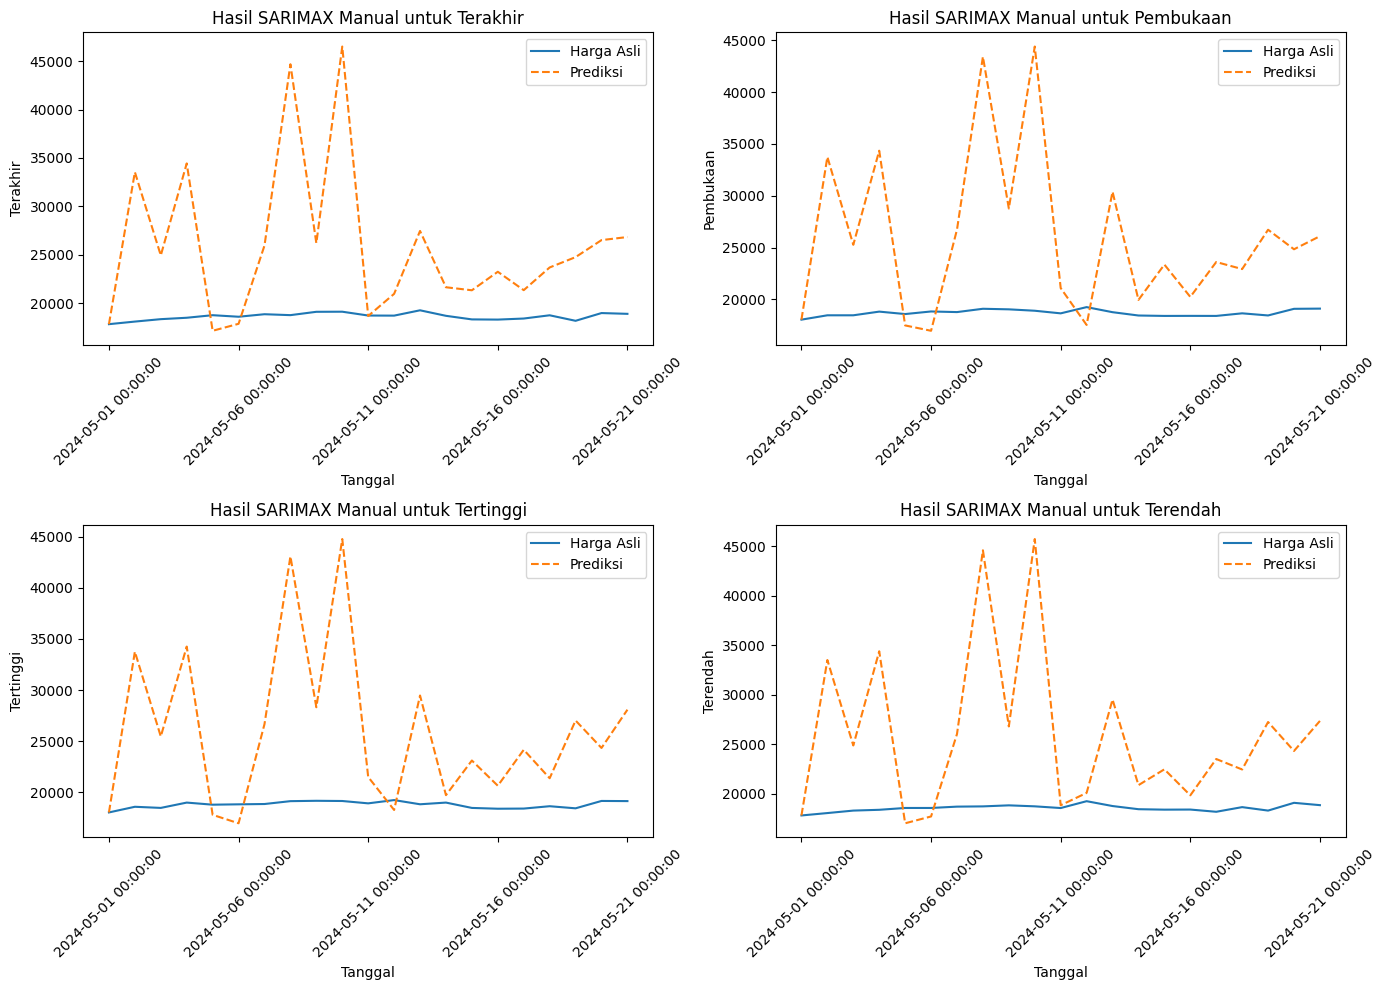

In [29]:
# Langkah 1: Implementasi Komponen Eksogen
def exogenous_component(series, exog):
    exog_component = np.zeros_like(series)  # Membuat array kosong untuk menyimpan komponen eksogen
    for t in range(len(series)):
        # Menghitung komponen eksogen
        exog_component[t] = np.dot(exog[t], np.ones(len(exog[t])))
    return exog_component

# Fungsi untuk melakukan SARIMAX manual
def manual_sarimax(series, exog, p, d, q, P, D, Q, m):
    # Langkah differencing non-musiman
    diff_series = differencing(series, d)
    # Langkah differencing musiman
    seasonal_diff_series = seasonal_differencing(diff_series, D, m)
    
    # Langkah autoregressive non-musiman
    ar_series = autoregressive_component(seasonal_diff_series, p)
    # Langkah moving average non-musiman
    ma_series = moving_average_component(seasonal_diff_series, q)
    
    # Langkah autoregressive musiman
    seasonal_ar_series = seasonal_ar_component(seasonal_diff_series, P, m)
    # Langkah moving average musiman
    seasonal_ma_series = seasonal_ma_component(seasonal_diff_series, Q, m)
    
    # Langkah komponen eksogen
    exog_series = exogenous_component(seasonal_diff_series, exog)
    
    # Gabungkan semua komponen
    sarimax_series = ar_series + ma_series + seasonal_ar_series + seasonal_ma_series + exog_series
    return sarimax_series

# Pencarian parameter terbaik untuk SARIMAX
def find_best_sarimax_params(data, exog, p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    best_aic = np.inf
    best_params = None
    best_model = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in m_values:
                                try:
                                    y_pred = manual_sarimax(data, exog, p, d, q, P, D, Q, m)
                                    aic = calculate_aic(data[max(d, D * m):], y_pred[max(d, D * m):], p + q + P + Q + exog.shape[1])
                                    if aic < best_aic:
                                        best_aic = aic
                                        best_params = (p, d, q, P, D, Q, m)
                                        best_model = y_pred
                                except:
                                    continue
    return best_params, best_model

# Nilai parameter yang akan dicoba
p_values = range(1, 3)
d_values = range(1, 3)
q_values = range(1, 3)
P_values = range(1, 3)
D_values = range(1, 3)
Q_values = range(1, 3)
m_values = [3]  # Musim tahunan

# Asumsikan data eksogen sudah di-load dari data asli
exog_data = data[['Harga Pupuk', 'Curah Hujan', 'Jumlah Produksi']].values

# Membuat DataFrame untuk menyimpan hasil perhitungan
results = {}
best_params_dict = {}

# Proses untuk setiap kolom harga
for kol in ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']:
    series = data[kol].values
    best_params, best_model = find_best_sarimax_params(series, exog_data, p_values, d_values, q_values, P_values, D_values, Q_values, m_values)
    best_params_dict[kol] = best_params  # Simpan parameter terbaik untuk kolom
    results[kol] = best_model  # Simpan hasil prediksi
    
    print(f"Parameter terbaik untuk {kol}: p={best_params[0]}, d={best_params[1]}, q={best_params[2]}, P={best_params[3]}, D={best_params[4]}, Q={best_params[5]}, m={best_params[6]}")
    
    # Ganti prediksi 0 dengan data asli pada iterasi pertama
    best_model[0] = series[0]
    
    # Hitung metrik evaluasi
    mse, rmse, mae, mape = calculate_metrics(series, best_model)
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}")

    # Buat DataFrame untuk hasil
    df_result = pd.DataFrame({
        'Tanggal': data['Tanggal'],
        'Harga Asli': series,
        'Prediksi': best_model,
        'Selisih': best_model - series,
        'Persentase Selisih': (best_model - series) / best_model * 100
    })

    # Urutkan DataFrame berdasarkan tanggal dari yang terlama hingga terbaru
    df_result = df_result.sort_values(by='Tanggal').reset_index(drop=True)

    # Tampilkan hasil dalam bentuk tabel
    print(f"\nHasil SARIMAX untuk {kol}:")
    print(df_result)

# Plot hasil SARIMAX dengan parameter terbaik dalam format 2x2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, kol in enumerate(['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']):
    original = data[kol].values
    prediction = results[kol]
    
    # Ganti prediksi 0 dengan data asli pada iterasi pertama
    prediction[0] = original[0]
    
    # Buat DataFrame untuk setiap kolom
    df_result = pd.DataFrame({
        'Tanggal': data['Tanggal'],
        'Harga Asli': original,
        'Prediksi': prediction
    })
    
    # Urutkan DataFrame berdasarkan tanggal dari yang terlama hingga terbaru
    df_result = df_result.sort_values(by='Tanggal').reset_index(drop=True)

    # Plot hasil SARIMAX
    ax = axs[i//2, i%2]
    ax.plot(df_result['Tanggal'], df_result['Harga Asli'], label='Harga Asli')
    ax.plot(df_result['Tanggal'], df_result['Prediksi'], label='Prediksi', linestyle='--')
    ax.set_title(f'Hasil SARIMAX Manual untuk {kol}')
    ax.set_xlabel('Tanggal')
    ax.set_ylabel(kol)
    ax.legend()
    # Set interval tanggal setiap 5 hari
    ax.set_xticks(df_result['Tanggal'][::5])
    ax.set_xticklabels(df_result['Tanggal'][::5], rotation=45)

plt.tight_layout()
plt.show()
